In [ ]:
import gym
import collections
import random

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#Hyperparameters
learning_rate = 0.0005
gamma         = 0.98
buffer_limit  = 50000
batch_size    = 32

class ReplayBuffer():
    def __init__(self):
        self.buffer = collections.deque(maxlen=buffer_limit)
    
    def put(self, transition):
        self.buffer.append(transition)
    
    def sample(self, n):
        mini_batch = random.sample(self.buffer, n)
        s_lst, a_lst, r_lst, s_prime_lst, done_mask_lst = [], [], [], [], []
        
        for transition in mini_batch:
            s, a, r, s_prime, done_mask = transition
            s_lst.append(s)
            a_lst.append([a])
            r_lst.append([r])
            s_prime_lst.append(s_prime)
            done_mask_lst.append([done_mask])

        return torch.tensor(s_lst, dtype=torch.float), torch.tensor(a_lst), \
               torch.tensor(r_lst), torch.tensor(s_prime_lst, dtype=torch.float), \
               torch.tensor(done_mask_lst)
    
    def size(self):
        return len(self.buffer)

class Qnet(nn.Module):
    def __init__(self):
        super(Qnet, self).__init__()
        self.fc1 = nn.Linear(4, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
      
    def sample_action(self, obs, epsilon):
        out = self.forward(obs)
        coin = random.random()
        if coin < epsilon:
            return random.randint(0,1)
        else : 
            return out.argmax().item()
            
def train(q, q_target, memory, optimizer):
    for i in range(10):
        s,a,r,s_prime,done_mask = memory.sample(batch_size)

        q_out = q(s)
        q_a = q_out.gather(1,a)
        max_q_prime = q_target(s_prime).max(1)[0].unsqueeze(1)
        target = r + gamma * max_q_prime * done_mask
        loss = F.smooth_l1_loss(q_a, target)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

def main():
    env = gym.make('CartPole-v1')
    q = Qnet()
    q_target = Qnet()
    q_target.load_state_dict(q.state_dict())
    memory = ReplayBuffer()

    print_interval = 20
    score = 0.0  
    optimizer = optim.Adam(q.parameters(), lr=learning_rate)

    for n_epi in range(10000):
        epsilon = max(0.01, 0.08 - 0.01*(n_epi/200)) #Linear annealing from 8% to 1%
        s, _ = env.reset()
        done = False

        while not done:
            a = q.sample_action(torch.from_numpy(s).float(), epsilon)      
            s_prime, r, done, truncated, info = env.step(a)
            done_mask = 0.0 if done else 1.0
            memory.put((s,a,r/100.0,s_prime, done_mask))
            s = s_prime

            score += r
            if done:
                break
            
        if memory.size()>2000:
            train(q, q_target, memory, optimizer)

        if n_epi%print_interval==0 and n_epi!=0:
            q_target.load_state_dict(q.state_dict())
            print("n_episode :{}, score : {:.1f}, n_buffer : {}, eps : {:.1f}%".format(
                                                            n_epi, score/print_interval, memory.size(), epsilon*100))
            score = 0.0
    env.close()

if __name__ == '__main__':
    main()

In [1]:
class Person:
    def __init__(self, name, age):
        self.name = name
        self.age = age
        
    def say_hello(self):
        print(f"hello. i am {self.name}, and i am {self.age} years olf")
        

In [2]:
a = Person("홍길동", 25)

In [4]:
a.say_hello()

hello. i am 홍길동, and i am 25 years olf


In [7]:
class Car:
    def __init__(self, color, speed):
        self.color = color
        self.speed = speed
        
    def upSpeed(self, value):
        self.speed += value
        
    def downSpeed(self, vlaue):
        self.speed -= value
        
    def print_info(self):
        result = f'color : {self.color}, speed = {self.speed}'
        print(result)

In [8]:
A = Car("Red", 150)
A.print_info()
A.upSpeed(50)
A.color = "Yello"
A.print_info()

color : Red, speed = 150
color : Yello, speed = 200


In [9]:
c1_color = input("c1 자동차에 들어갈 색을 입력하세요 : ")
c2_color = input("c2 자동차에 들어갈 색을 입력하세요 : ")
c1 = Car(c1_color, 200)
c2 = Car(c2_color, 150)
print(f'car1.color = {c1.color}')
print(f'car2.color = {c2.color}')
c1.print_info()
c2.print_info()

c1 자동차에 들어갈 색을 입력하세요 : Blue
c2 자동차에 들어갈 색을 입력하세요 : Pink
car1.color = Blue
car2.color = Pink
color : Blue, speed = 200
color : Pink, speed = 150


In [11]:
import numpy as np

a1 = np.array([[2, 3, 1], [-1, 2, 3]])
a2 = np.array([[5], [-2], [3]])

In [12]:
a3 = a1@a2

In [13]:
print(a3)

[[7]
 [0]]


In [15]:
w = np.array([[3, 1, 6, 2], [10, 5, 4, 4], [1, 7, 2, 3], [8, 5, 0, 1]])
x = np.array([[5], [6], [1], [3]])
b = np.array([[0], [5], [2], [4]])


In [17]:
print(np.sum(w*x+b))

297


In [2]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pyautogui as pag

0

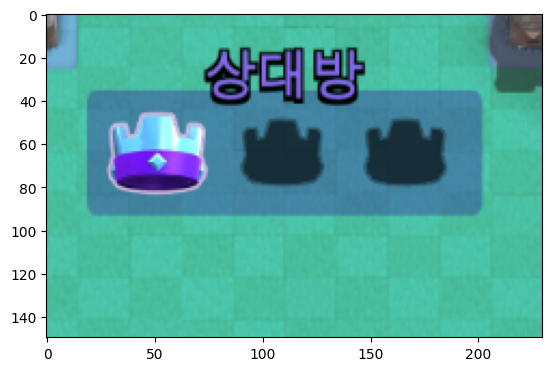

In [5]:
score1 = 0 
score2 = 0 

play_screen = cv2.imread('/home/jnu/Desktop/Reinforce/Royale/screenshot/cr_test/tower_crash.png')
play_screen = Image.fromarray(play_screen)

plt.imshow(play_screen)

class ENV():
    def __init__(self):
        # screenshot의 위치 지정, 클래스 생성할때 가져오기

        # winflg와 lose flag 존재해야 함. 0으로 하는 건 grayscale
        self.winFlag = cv2.imread('/home/jnu/Desktop/Reinforce/Royale/screenshot/cr_test/weWin.png', 0)
        self.loseFlag = cv2.imread('/home/jnu/Desktop/Reinforce/Royale/screenshot/cr_test/enemyWin.png', 0)
        # nocard flag
        self.nocardFlag = cv2.imread('/home/jnu/Desktop/Reinforce/Royale/screenshot/test1/nocard.png')
        # noElixir flag
        self.noelixirFlag = cv2.imread('/home/jnu/Desktop/Reinforce/Royale/screenshot/test1/noElixir.png')
        self.startGameFlag = cv2.imread('/home/jnu/Desktop/Reinforce/Royale/screenshot/cr_test/battleStart.png')
        self.finishFlag = cv2.imread('/home/jnu/Desktop/Reinforce/Royale/screenshot/cr_test/battleFinish.png')
        self.crashFlag = cv2.imread('/home/jnu/Desktop/Reinforce/Royale/screenshot/cr_test/tower_crash.png')

    def return_state(self, img):
        # 스크린 샷을 인자로 받아와서 모델에 넣을 수 있도록 tensor로 변환
        tf = transforms.ToTensor()
        img_t = tf(img)
        img_t = img_t.unsqueeze(0)
        # img_t = img_t.permute(1, 0, 2, 3)

        return img_t

    def check_finish(self,img):
    	finishMessage = cv2.cvtColor(self.finishFlag, cv2.COLOR_BGR2GRAY)
    	img = np.array(img)
    	img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    	ratio = cv2.matchTemplate(finishMessage, img, cv2.TM_CCOEFF_NORMED)
    	if (np.max(ratio) > 0.90):
    	    return 1
    	    
    	else:
    	    return 0
        
    def check_crash(self,img):
        crashMessage = cv2.cvtColor(self.crashFlag, cv2.COLOR_BGR2GRAY)
        img = np.array(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ratio = cv2.matchTemplate(crashMessage, img, cv2.TM_CCOEFF_NORMED)
        if (np.max(ratio) > 0.90):
            return 1
            
        else:
            return 0

env = ENV()
img = pag.screenshot(region=(2605, 100, 510, 900))
env.check_finish(img)

100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
96
46


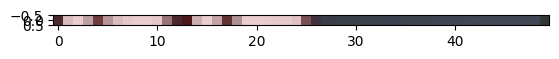

In [3]:
while(1):
    score2 = 0 
    img = pag.screenshot(region=(2605, 100, 510, 900))
    checkFlag1 = np.array(img.crop((105, 135, 155, 136)))
    for i in range(50):
        if(checkFlag1[0][i][0]>=96):
            score2 +=1
    score2 = score2 * 2
    print(score2)
    plt.imshow(checkFlag1)
    if(score2<90):
        break

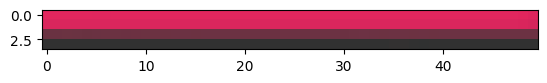

In [297]:
#img = pag.screenshot(region=(2605, 100, 510, 900))
img = pag.screenshot(region=(2605, 100, 510, 900))
checkFlag1 = np.array(img.crop((105, 133, 155, 137)))

plt.imshow(checkFlag1)

[[[122 112 110]
  [127 117 115]
  [124 116 113]
  ...
  [ 57 141 182]
  [ 66  88 108]
  [ 73  58  54]]

 [[118 109 108]
  [116 108 108]
  [114 103 105]
  ...
  [ 57 145 189]
  [ 67  97 119]
  [ 76  64  54]]

 [[122 110 108]
  [118 108 107]
  [111 106  98]
  ...
  [ 68 109 132]
  [ 73  81  84]
  [ 80  66  59]]

 ...

 [[177 143   0]
  [173 142   0]
  [169 139   2]
  ...
  [123 160 226]
  [113 145 210]
  [130 166 228]]

 [[180 144   0]
  [163 139   4]
  [155 137  13]
  ...
  [124 161 225]
  [113 146 210]
  [130 164 228]]

 [[148 145  30]
  [ 88 166 112]
  [ 81 162 118]
  ...
  [126 161 226]
  [114 146 213]
  [128 164 227]]]


True

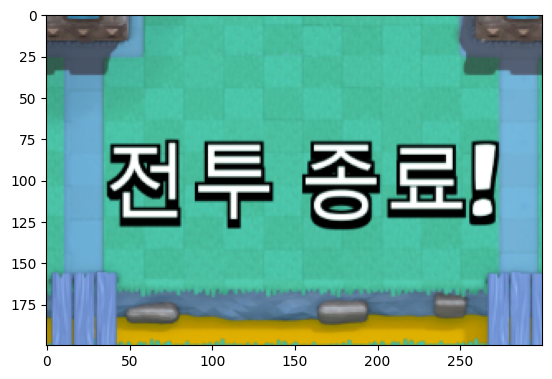

In [6]:

play_screen = cv2.imread('/home/jnu/Desktop/Reinforce/Royale/screenshot/test1/screenshot1.png')
img = pag.screenshot(region=(2605, 100, 510, 900))
play_screen = Image.fromarray(play_screen)
checkFlag1 = np.array(play_screen.crop((100,200,400,400)))
print(checkFlag1)
plt.imshow(checkFlag1)
cv2.imwrite('/home/jnu/Desktop/Reinforce/Royale/screenshot/test1/screenshot2.png', checkFlag1)

In [7]:
import pyautogui as pag

class ENV():
    def __init__(self):
        # screenshot의 위치 지정, 클래스 생성할때 가져오기

        # winflg와 lose flag 존재해야 함. 0으로 하는 건 grayscale
        self.winFlag = cv2.imread('/home/jnu/Desktop/Reinforce/Royale/screenshot/cr_test/weWin.png', 0)
        self.loseFlag = cv2.imread('/home/jnu/Desktop/Reinforce/Royale/screenshot/cr_test/enemyWin.png', 0)
        # nocard flag
        self.nocardFlag = cv2.imread('/home/jnu/Desktop/Reinforce/Royale/screenshot/test1/nocard.png')
        # noElixir flag
        self.noelixirFlag = cv2.imread('/home/jnu/Desktop/Reinforce/Royale/screenshot/test1/noElixir.png')
        self.startGameFlag = cv2.imread('/home/jnu/Desktop/Reinforce/Royale/screenshot/cr_test/battleStart.png')
        self.finishFlag = cv2.imread('/home/jnu/Desktop/Reinforce/Royale/screenshot/cr_test/battleFinish.png')

    def return_state(self, img):
        # 스크린 샷을 인자로 받아와서 모델에 넣을 수 있도록 tensor로 변환
        tf = transforms.ToTensor()
        img_t = tf(img)
        img_t = img_t.unsqueeze(0)
        # img_t = img_t.permute(1, 0, 2, 3)

        return img_t

    def check_finish(self,img):
    	finishMessage = cv2.cvtColor(self.finishFlag, cv2.COLOR_BGR2GRAY)
    	img = np.array(img)
    	img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    	ratio = cv2.matchTemplate(finishMessage, img, cv2.TM_CCOEFF_NORMED)
    	if (np.max(ratio) > 0.90):
    	    return 1
    	    
    	else:
    	    return 0

env = ENV()
img = pag.screenshot(region=(2605, 100, 510, 900))
env.check_finish(img)

0

In [15]:
import time

#pag.click((2860, 875))
#time.sleep(1)
#pag.click((3070, 185))
#time.sleep(1)
#pag.click((2920, 385))
#time.sleep(1)
pag.click((2950, 615))

In [1]:
import gym
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import collections
import random
import matplotlib.pyplot as plt
import pyautogui as pag
import PIL
import torchvision.transforms as transforms
import cv2
import numpy as np
from torch.utils.tensorboard import SummaryWriter
from PIL import Image
import time

pag.FAILSAFE = False

class ENV():
    def __init__(self):
        # screenshot의 위치 지정, 클래스 생성할때 가져오기

        # winflg와 lose flag 존재해야 함. 0으로 하는 건 grayscale
        self.winFlag = cv2.imread('/home/jnu/Desktop/Reinforce/Royale/screenshot/cr_test/weWin.png', 0)
        self.loseFlag = cv2.imread('/home/jnu/Desktop/Reinforce/Royale/screenshot/cr_test/enemyWin.png', 0)
        # nocard flag
        self.nocardFlag = cv2.imread('/home/jnu/Desktop/Reinforce/Royale/screenshot/test1/nocard.png')
        # noElixir flag
        self.noelixirFlag = cv2.imread('/home/jnu/Desktop/Reinforce/Royale/screenshot/test1/noElixir.png')
        self.startGameFlag = cv2.imread('/home/jnu/Desktop/Reinforce/Royale/screenshot/cr_test/battleStart.png')
        self.finishFlag = cv2.imread('/home/jnu/Desktop/Reinforce/Royale/screenshot/cr_test/battleFinish.png')

    def return_state(self, img):
        # 스크린 샷을 인자로 받아와서 모델에 넣을 수 있도록 tensor로 변환
        tf = transforms.ToTensor()
        img_t = tf(img)
        img_t = img_t.unsqueeze(0)
        # img_t = img_t.permute(1, 0, 2, 3)

        return img_t

    def check_finish(self,img):
    	finishMessage = cv2.cvtColor(self.finishFlag, cv2.COLOR_BGR2GRAY)
    	img = np.array(img)
    	img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    	ratio = cv2.matchTemplate(finishMessage, img, cv2.TM_CCOEFF_NORMED)
    	if (np.max(ratio) > 0.90):
    	    return 1
    	    
    	else:
    	    return 0
    	                
    def check_win(self, img):
        # 게임이 이겼는지 확인, screenshot을 가져와서 우리가 원하는 크기로 잘라서 확인
        # img = np.array(img)
        checkFlag1 = np.array(img.crop((225, 335, 280, 365)))
        checkFlag1 = cv2.cvtColor(checkFlag1, cv2.COLOR_BGR2GRAY)
        win_check = cv2.matchTemplate(checkFlag1, self.winFlag, cv2.TM_CCOEFF_NORMED)
        if win_check > 0.8:
            return 1

        else:
            return 0
           
    def check_lose(self, img):
        # 게임이 졌는지 확인, screenshot을 가져와서 우리가 원하는 크기로 잘라서 확인
        # img = np.array(img)
        checkFlag2 = np.array(img.crop((225, 85, 280, 115)))
        checkFlag2 = cv2.cvtColor(checkFlag2, cv2.COLOR_BGR2GRAY)
        lose_check = cv2.matchTemplate(checkFlag2, self.loseFlag, cv2.TM_CCOEFF_NORMED)
        if lose_check > 0.8:
            return 1

        else:
            return 0

    def check_card(self, img):
        # 카드를 선택하지 않았는지 확인, screenshot을 가져와서 init에 지정된 nocard 이미지와 비교하여 reward 부여
        nocard = cv2.cvtColor(self.nocardFlag, cv2.COLOR_BGR2GRAY)
        img = np.array(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ratio = cv2.matchTemplate(nocard, img, cv2.TM_CCOEFF_NORMED)

        if (np.max(ratio) > 0.90):
            # print(np.max(ratio))
            return 1

        else:
            return 0

    def check_elixir(self, img):
        noElixir = cv2.cvtColor(self.noelixirFlag, cv2.COLOR_BGR2GRAY)
        img = np.array(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ratio = cv2.matchTemplate(noElixir, img, cv2.TM_CCOEFF_NORMED)

        if (np.max(ratio) > 0.90):
            # print(np.max(ratio))
            return 1

        else:
            return 0

    def checkET1(self, img):
        score1 = 0
        checkFlag1 = np.array(img.crop((105, 138, 155, 139)))

        for i in range(50):
            if (checkFlag1[0][i][0] >= 96):
                score1 += 1

        score1 = score1 * 2
        return score1

    def checkET2(self, img):
        score2 = 0
        checkFlag2 = np.array(img.crop((371, 138, 421, 139)))

        for i in range(50):
            if (checkFlag2[0][i][0] >= 96):
                score2 += 1

        score2 = score2 * 2
        return score2

    def checkGameStart(self, img):
        startMessage = cv2.cvtColor(self.startGameFlag, cv2.COLOR_BGR2GRAY)
        img = np.array(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ratio = cv2.matchTemplate(startMessage, img, cv2.TM_CCOEFF_NORMED)
        if (np.max(ratio) > 0.90):
            # print(np.max(ratio))
            return 1

        else:
            return 0

    # def checkET3

    # def checkOT1
    # def checkOT1
    # def checkOT1

    # 우리 타워와 상대 타워의 hp를 확인하여 reward 부여

    def retryGame(self):
        time.sleep(3)
        pag.click((2860, 875))
        time.sleep(5)
        pag.click((3070, 185))
        time.sleep(5)
        pag.click((2920, 385))
        time.sleep(3)
        pag.click((2950, 615))


In [36]:
env = ENV()
img = pag.screenshot(region=(2605, 100, 510, 900))

if (env.check_lose(img)):
    print("lose")
    
if (env.check_win(img)):
    print("win")

lose


In [51]:
pag.click((2855, 920))